In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def fitness(data: list) -> dict:
    data = np.asarray(data)
    data_sorted = np.sort(data)
    ecdf = np.arange(1, len(data_sorted)+1) / len(data_sorted)
    
    distributions = {
        'uniform': stats.uniform,
        'normal': stats.norm,
        'lognormal': stats.lognorm,
        'gumbel max': stats.gumbel_r,
        'gumbel min': stats.gumbel_l,
        'triangular': stats.triang,
        'gamma': stats.gamma
    }
    
    fit_results = {}
    
    plt.figure(figsize=(10, 6))
    plt.scatter(data_sorted, ecdf, label="Dados (ECDF)", color='black', s=10)

    for name, dist in distributions.items():
        try:
            params = dist.fit(data)
            # Calcular média e desvio padrão usando momentos da distribuição ajustada
            mean, std = dist.mean(*params), dist.std(*params)
            fit_results[name] = (*params[:3], mean, std)

            # Gerar CDF ajustada
            x = np.linspace(min(data), max(data), 200)
            y = dist.cdf(x, *params)
            plt.plot(x, y, label=f"{name}", lw=1.5)
        except Exception as e:
            print(f"Erro ao ajustar {name}: {e}")
    
    plt.title("Ajuste de distribuições (CDF vs ECDF)")
    plt.xlabel("Valor")
    plt.ylabel("F(x)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    return fit_results


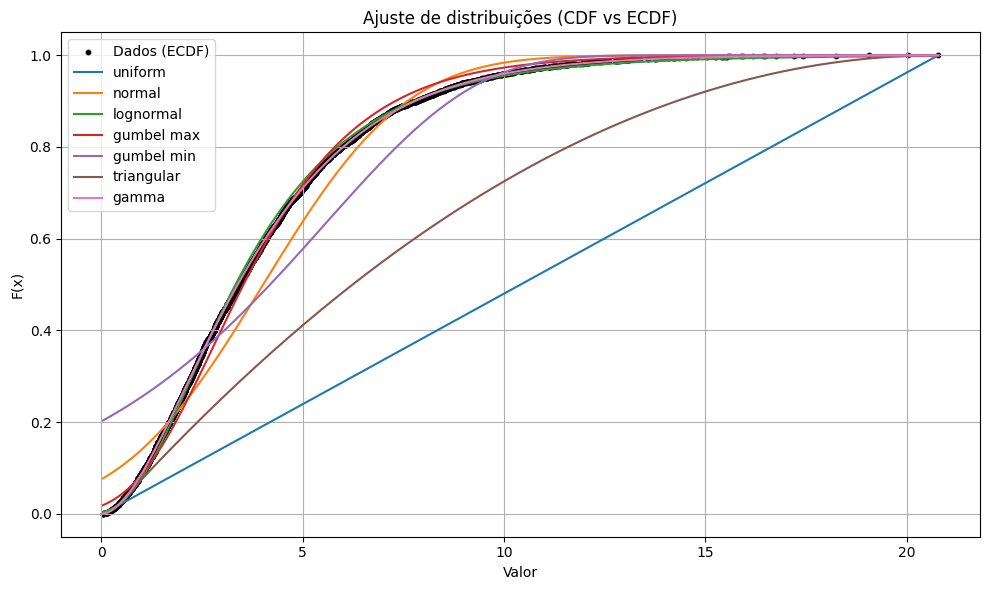

uniform: params = (0.04524479780103271, 20.73558419022639, np.float64(10.413036892914228), np.float64(5.985847557015678))
normal: params = (np.float64(4.021515936060799), np.float64(2.7938662757302453), np.float64(4.021515936060799), np.float64(2.7938662757302453))
lognormal: params = (np.float64(0.552599569584638), -0.9460770958632287, np.float64(4.280226236033027), np.float64(4.0401972620176885), np.float64(2.979781888468003))
gumbel max: params = (np.float64(2.800934501494679), 1.9986540850950094, np.float64(3.9545889481309597), np.float64(2.56337345739092))
gumbel min: params = (np.float64(5.559408060780097), 3.7258062992696157, np.float64(3.408814300452866), np.float64(4.778532236344249))
triangular: params = (np.float64(0.021049730568869635), np.float64(-0.002109871974428463), np.float64(20.788676460949567), np.float64(7.073314294470891), np.float64(4.849189604850611))
gamma: params = (np.float64(2.050781941224534), np.float64(-0.010266027649917048), np.float64(1.9659649508759567

In [4]:
dados = np.random.gamma(shape=2.0, scale=2.0, size=5000)
resultados = fitness(dados)

for dist_name, params in resultados.items():
    print(f"{dist_name}: params = {params}")
